<a href="https://colab.research.google.com/github/manishmcsa/Assigment-6/blob/main/Training_model_BN_L1_L2_NoL1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Ass6"

/content/drive/MyDrive/Ass6


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

In [5]:
from batchnorm import BatchNorm as BN
from model_bn import Net
from model_train import train
from model_test import test
from model_run import run

import model_bn
import batchnorm
import model_train
import model_test
import model_run

In [5]:
# without l1&L2
test_losses, test_acc, misclassified_imgs = run(l1_decay=0.0, l2_decay=0.0)

  0%|          | 0/1875 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0714, Accuracy: 9781/10000 (97.81%)

EPOCH: 2


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0457, Accuracy: 9845/10000 (98.45%)

EPOCH: 3


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0296, Accuracy: 9900/10000 (99.00%)

EPOCH: 4


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0328, Accuracy: 9904/10000 (99.04%)

EPOCH: 5


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9891/10000 (98.91%)

EPOCH: 6


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0250, Accuracy: 9907/10000 (99.07%)

EPOCH: 7


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0287, Accuracy: 9909/10000 (99.09%)

EPOCH: 8


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0312, Accuracy: 9898/10000 (98.98%)

EPOCH: 9


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Accuracy: 9926/10000 (99.26%)

EPOCH: 10


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 9914/10000 (99.14%)

EPOCH: 11


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9926/10000 (99.26%)

EPOCH: 12


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 9922/10000 (99.22%)

EPOCH: 13


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9933/10000 (99.33%)

EPOCH: 14


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9920/10000 (99.20%)

EPOCH: 15


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9933/10000 (99.33%)

EPOCH: 16


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9935/10000 (99.35%)

EPOCH: 17


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9922/10000 (99.22%)

EPOCH: 18


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9924/10000 (99.24%)

EPOCH: 19


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9923/10000 (99.23%)

EPOCH: 20


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0247, Accuracy: 9922/10000 (99.22%)

EPOCH: 21


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9930/10000 (99.30%)

EPOCH: 22


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9927/10000 (99.27%)

EPOCH: 23


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 9925/10000 (99.25%)

EPOCH: 24


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 9931/10000 (99.31%)

EPOCH: 25


100%|██████████| 1875/1875 [00:33<00:00, 55.42it/s]
/content/drive/MyDrive/Ass6/model_test.py:35: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct == 0).nonzero()[:, 0]



Test set: Average loss: 0.0218, Accuracy: 9934/10000 (99.34%)



In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_misclassified_images(img_data, img_name):
  figure = plt.figure(figsize=(10, 10))
  num_of_images = len(img_data)
  for index in range(1, num_of_images + 1):
      plt.subplot(5, 5, index)
      plt.axis('off')
      plt.imshow(img_data[index-1]["img"], cmap='gray_r')
      plt.title("Predicted: %s\nActual: %s" % (img_data[index-1]["pred"], img_data[index-1]["target"]))
  plt.tight_layout()
  plt.savefig(img_name)

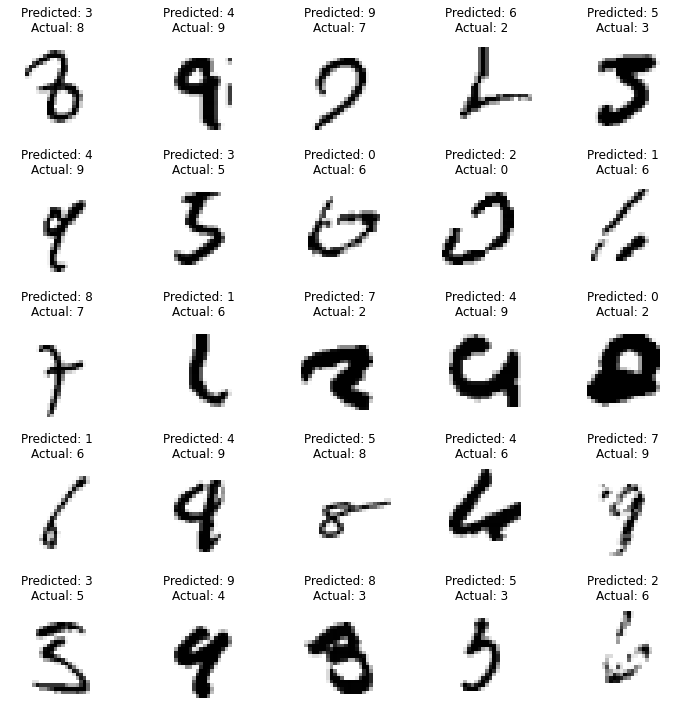

In [9]:
# without l1&L2
plot_misclassified_images(misclassified_imgs, "misclassified_imgs_l1.png")

In [7]:
# with l1
test_losses_l1, test_acc_l1, misclassified_imgs_l1 = run(l1_decay=0.0005, l2_decay=0.0)

  0%|          | 0/1875 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.2397, Accuracy: 9293/10000 (92.93%)

EPOCH: 2


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1127, Accuracy: 9649/10000 (96.49%)

EPOCH: 3


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1247, Accuracy: 9635/10000 (96.35%)

EPOCH: 4


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1021, Accuracy: 9703/10000 (97.03%)

EPOCH: 5


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0898, Accuracy: 9725/10000 (97.25%)

EPOCH: 6


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0807, Accuracy: 9756/10000 (97.56%)

EPOCH: 7


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0698, Accuracy: 9774/10000 (97.74%)

EPOCH: 8


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0540, Accuracy: 9842/10000 (98.42%)

EPOCH: 9


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0714, Accuracy: 9770/10000 (97.70%)

EPOCH: 10


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0794, Accuracy: 9750/10000 (97.50%)

EPOCH: 11


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1516, Accuracy: 9532/10000 (95.32%)

EPOCH: 12


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1291, Accuracy: 9574/10000 (95.74%)

EPOCH: 13


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1537, Accuracy: 9500/10000 (95.00%)

EPOCH: 14


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1495, Accuracy: 9515/10000 (95.15%)

EPOCH: 15


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1638, Accuracy: 9495/10000 (94.95%)

EPOCH: 16


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1265, Accuracy: 9594/10000 (95.94%)

EPOCH: 17


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0819, Accuracy: 9743/10000 (97.43%)

EPOCH: 18


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0712, Accuracy: 9781/10000 (97.81%)

EPOCH: 19


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1078, Accuracy: 9668/10000 (96.68%)

EPOCH: 20


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1164, Accuracy: 9602/10000 (96.02%)

EPOCH: 21


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1017, Accuracy: 9709/10000 (97.09%)

EPOCH: 22


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1211, Accuracy: 9636/10000 (96.36%)

EPOCH: 23


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0791, Accuracy: 9760/10000 (97.60%)

EPOCH: 24


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.1209, Accuracy: 9629/10000 (96.29%)

EPOCH: 25


100%|██████████| 1875/1875 [00:51<00:00, 36.11it/s]
/content/drive/My Drive/Ass6/model_test.py:35: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct == 0).nonzero()[:, 0]



Test set: Average loss: 0.0884, Accuracy: 9728/10000 (97.28%)



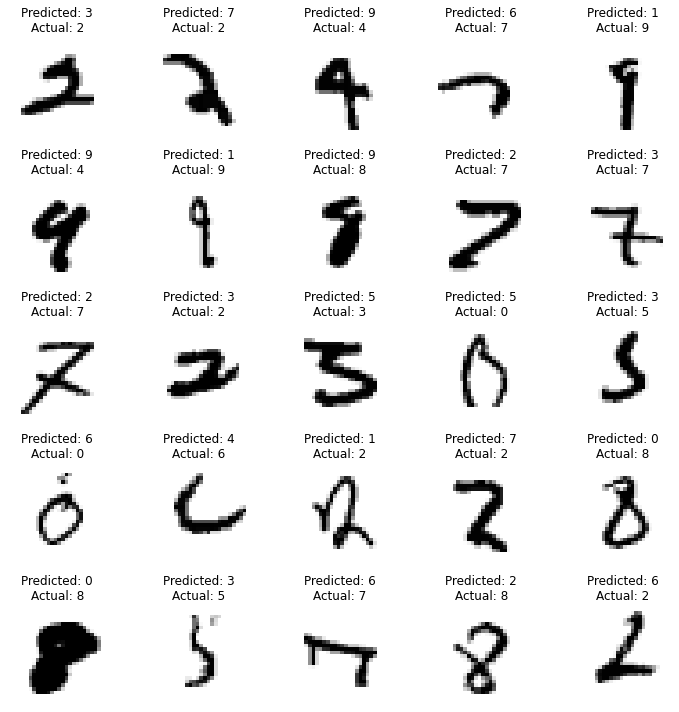

In [8]:
# with L1
plot_misclassified_images(misclassified_imgs_l1, "misclassified_imgs_l1.png")

In [9]:
# with l2
test_losses_l2, test_acc_l2, misclassified_imgs_l2 = run(l1_decay=0.0, l2_decay=0.0003)

  0%|          | 0/1875 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0609, Accuracy: 9788/10000 (97.88%)

EPOCH: 2


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0383, Accuracy: 9869/10000 (98.69%)

EPOCH: 3


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0403, Accuracy: 9877/10000 (98.77%)

EPOCH: 4


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 9870/10000 (98.70%)

EPOCH: 5


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0414, Accuracy: 9865/10000 (98.65%)

EPOCH: 6


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 9888/10000 (98.88%)

EPOCH: 7


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9893/10000 (98.93%)

EPOCH: 8


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9887/10000 (98.87%)

EPOCH: 9


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0257, Accuracy: 9918/10000 (99.18%)

EPOCH: 10


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9909/10000 (99.09%)

EPOCH: 11


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0298, Accuracy: 9894/10000 (98.94%)

EPOCH: 12


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9916/10000 (99.16%)

EPOCH: 13


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0275, Accuracy: 9916/10000 (99.16%)

EPOCH: 14


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9897/10000 (98.97%)

EPOCH: 15


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 9918/10000 (99.18%)

EPOCH: 16


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0296, Accuracy: 9908/10000 (99.08%)

EPOCH: 17


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9900/10000 (99.00%)

EPOCH: 18


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0348, Accuracy: 9883/10000 (98.83%)

EPOCH: 19


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0249, Accuracy: 9912/10000 (99.12%)

EPOCH: 20


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0273, Accuracy: 9907/10000 (99.07%)

EPOCH: 21


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9904/10000 (99.04%)

EPOCH: 22


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9875/10000 (98.75%)

EPOCH: 23


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9921/10000 (99.21%)

EPOCH: 24


  0%|          | 0/1875 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9920/10000 (99.20%)

EPOCH: 25


100%|██████████| 1875/1875 [00:55<00:00, 33.56it/s]



Test set: Average loss: 0.0247, Accuracy: 9922/10000 (99.22%)



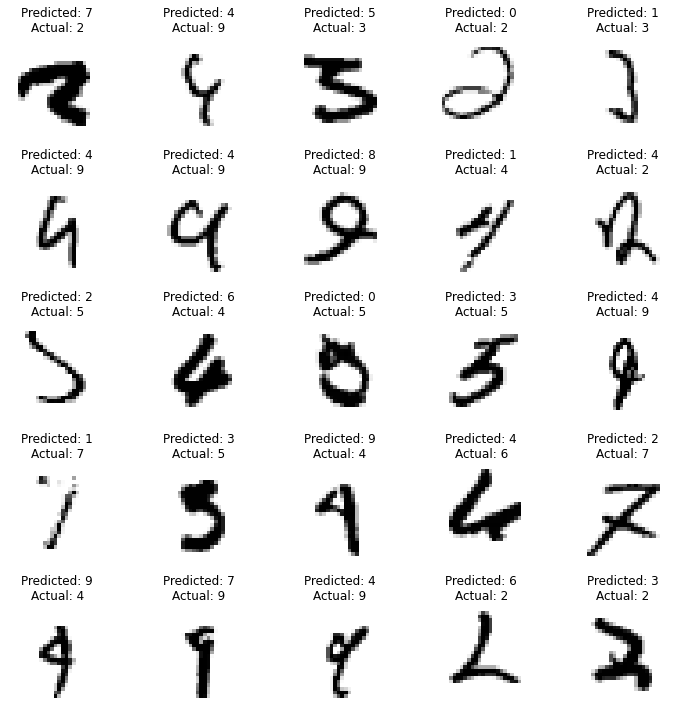

In [10]:
# with L2
plot_misclassified_images(misclassified_imgs_l2, "misclassified_imgs_l1.png")